RMSE: 4145.83
MAE: 2638.60
MAPE: 2.77%


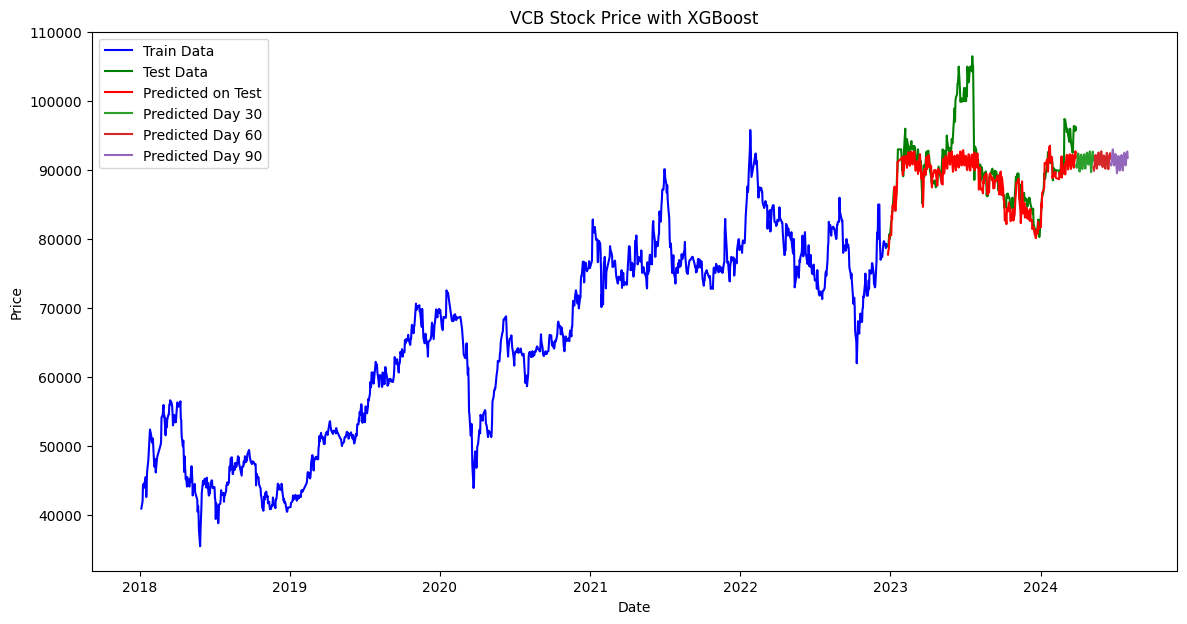

In [17]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load data into DataFrame df
df = pd.read_csv('../Dataset/VCB Historical Data.csv')

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])

# Convert other columns to numeric if necessary
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sort data by time from past to present
df.sort_values(by='Date', inplace=True)

# Create time features from Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Create lag features to capture patterns in the past
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Remove rows with NaN values due to lag feature creation
df.dropna(inplace=True)

# Select features and label
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Regression objective
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Number of training rounds
num_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')
# Plotting
plt.figure(figsize=(14, 7))

# Plot the training set
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Train Data', color='blue')

# Plot the test set
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Test Data', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted on Test', color='red')

# Additional predictions for the next 90 days
last_test_date = df['Date'].iloc[len(y_train) + len(y_test) - 1]
future_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90, freq='B')
future_df = pd.DataFrame({'Date': future_dates})
future_df['day'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['year'] = future_df['Date'].dt.year
future_df['day_of_week'] = future_df['Date'].dt.dayofweek
future_df['price_lag1'] = df['Price'].iloc[-1]
future_df['price_lag2'] = df['Price'].iloc[-2]
future_df['price_lag3'] = df['Price'].iloc[-3]
d_future = xgb.DMatrix(future_df[features])
future_pred = bst.predict(d_future)

# Divide the next 90 days into 3 periods of 30 days each and plot with different colors
future_len = len(future_dates)
segment_len = future_len // 3
for i in range(3):
    start_idx = i * segment_len
    end_idx = (i + 1) * segment_len if i < 2 else future_len
    plt.plot(future_df['Date'].iloc[start_idx:end_idx], future_pred[start_idx:end_idx], color=f'C{i+2}', label=f'Predicted Day {(i+1)*30}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('VCB Stock Price with XGBoost')
plt.legend()
plt.show()

VCB 9:1

RMSE: 1426.46
MAE: 1097.16
MAPE: 1.23%


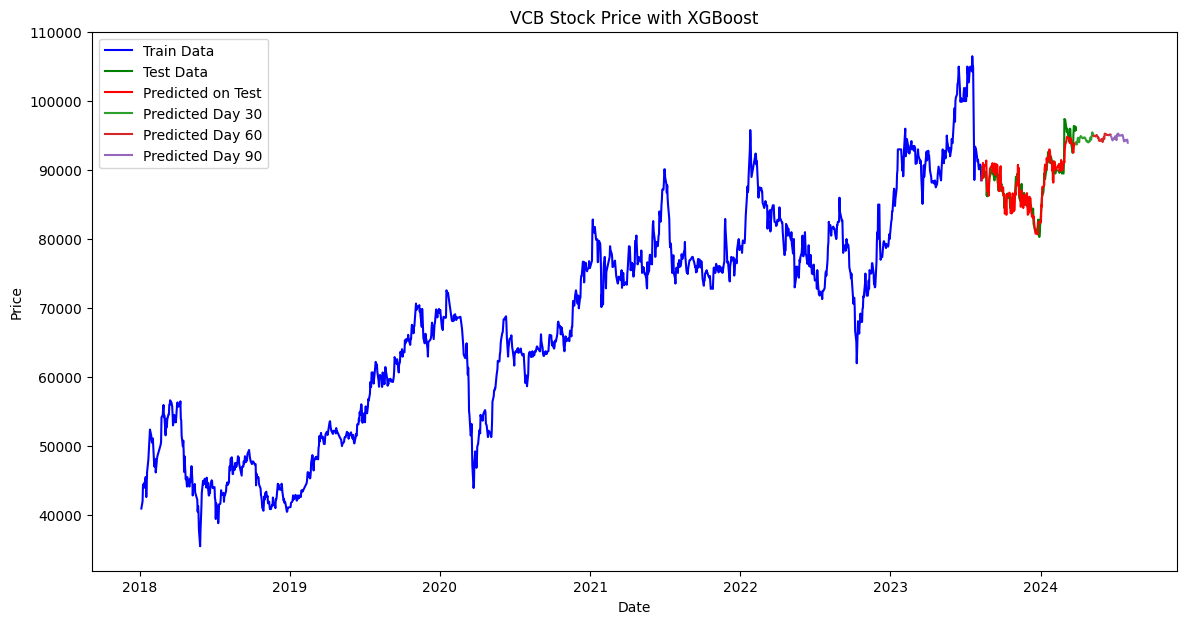

In [18]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load data into DataFrame df
df = pd.read_csv('../Dataset/VCB Historical Data.csv')

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])

# Convert other columns to numeric if necessary
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sort data by time from past to present
df.sort_values(by='Date', inplace=True)

# Create time features from Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Create lag features to capture patterns in the past
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Remove rows with NaN values due to lag feature creation
df.dropna(inplace=True)

# Select features and label
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Regression objective
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Number of training rounds
num_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')
# Plotting
plt.figure(figsize=(14, 7))

# Plot the training set
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Train Data', color='blue')

# Plot the test set
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Test Data', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted on Test', color='red')

# Additional predictions for the next 90 days
last_test_date = df['Date'].iloc[len(y_train) + len(y_test) - 1]
future_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90, freq='B')
future_df = pd.DataFrame({'Date': future_dates})
future_df['day'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['year'] = future_df['Date'].dt.year
future_df['day_of_week'] = future_df['Date'].dt.dayofweek
future_df['price_lag1'] = df['Price'].iloc[-1]
future_df['price_lag2'] = df['Price'].iloc[-2]
future_df['price_lag3'] = df['Price'].iloc[-3]
d_future = xgb.DMatrix(future_df[features])
future_pred = bst.predict(d_future)

# Divide the next 90 days into 3 periods of 30 days each and plot with different colors
future_len = len(future_dates)
segment_len = future_len // 3
for i in range(3):
    start_idx = i * segment_len
    end_idx = (i + 1) * segment_len if i < 2 else future_len
    plt.plot(future_df['Date'].iloc[start_idx:end_idx], future_pred[start_idx:end_idx], color=f'C{i+2}', label=f'Predicted Day {(i+1)*30}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('VCB Stock Price with XGBoost')
plt.legend()
plt.show()

VCB 7:3

RMSE: 3466.83
MAE: 2066.86
MAPE: 2.26%


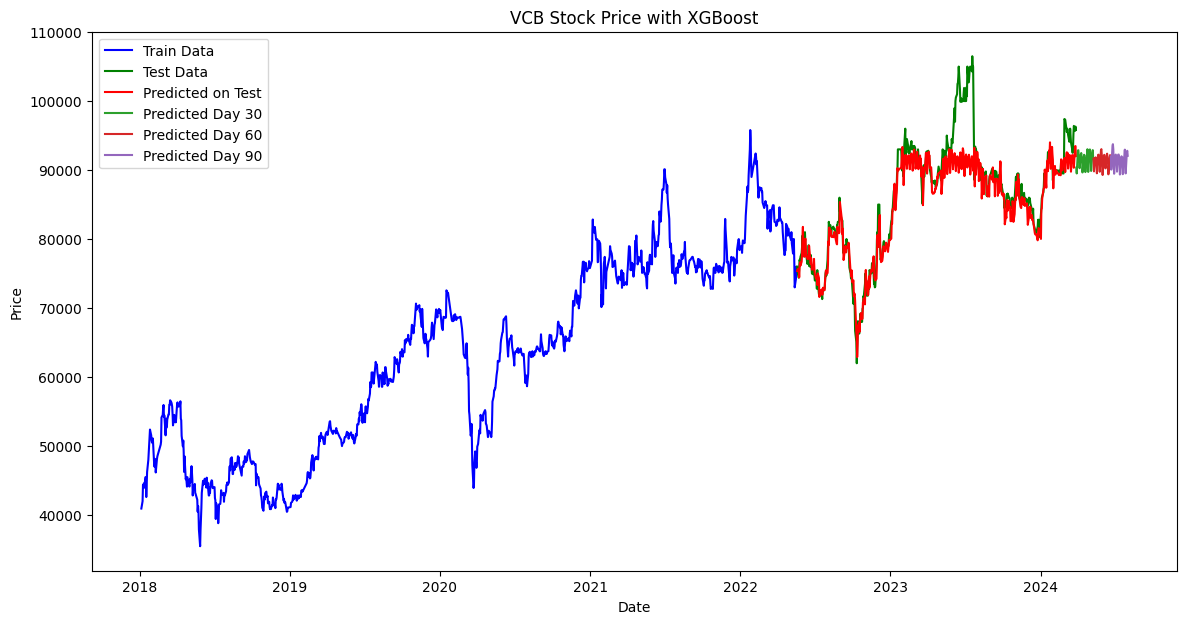

In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load data into DataFrame df
df = pd.read_csv('../Dataset/VCB Historical Data.csv')

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])

# Convert other columns to numeric if necessary
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sort data by time from past to present
df.sort_values(by='Date', inplace=True)

# Create time features from Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Create lag features to capture patterns in the past
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Remove rows with NaN values due to lag feature creation
df.dropna(inplace=True)

# Select features and label
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Regression objective
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Number of training rounds
num_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')
# Plotting
plt.figure(figsize=(14, 7))

# Plot the training set
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Train Data', color='blue')

# Plot the test set
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Test Data', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted on Test', color='red')

# Additional predictions for the next 90 days
last_test_date = df['Date'].iloc[len(y_train) + len(y_test) - 1]
future_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90, freq='B')
future_df = pd.DataFrame({'Date': future_dates})
future_df['day'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['year'] = future_df['Date'].dt.year
future_df['day_of_week'] = future_df['Date'].dt.dayofweek
future_df['price_lag1'] = df['Price'].iloc[-1]
future_df['price_lag2'] = df['Price'].iloc[-2]
future_df['price_lag3'] = df['Price'].iloc[-3]
d_future = xgb.DMatrix(future_df[features])
future_pred = bst.predict(d_future)

# Divide the next 90 days into 3 periods of 30 days each and plot with different colors
future_len = len(future_dates)
segment_len = future_len // 3
for i in range(3):
    start_idx = i * segment_len
    end_idx = (i + 1) * segment_len if i < 2 else future_len
    plt.plot(future_df['Date'].iloc[start_idx:end_idx], future_pred[start_idx:end_idx], color=f'C{i+2}', label=f'Predicted Day {(i+1)*30}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('VCB Stock Price with XGBoost')
plt.legend()
plt.show()

MBBank 7:3

RMSE: 626.85
MAE: 493.50
MAPE: 2.61%


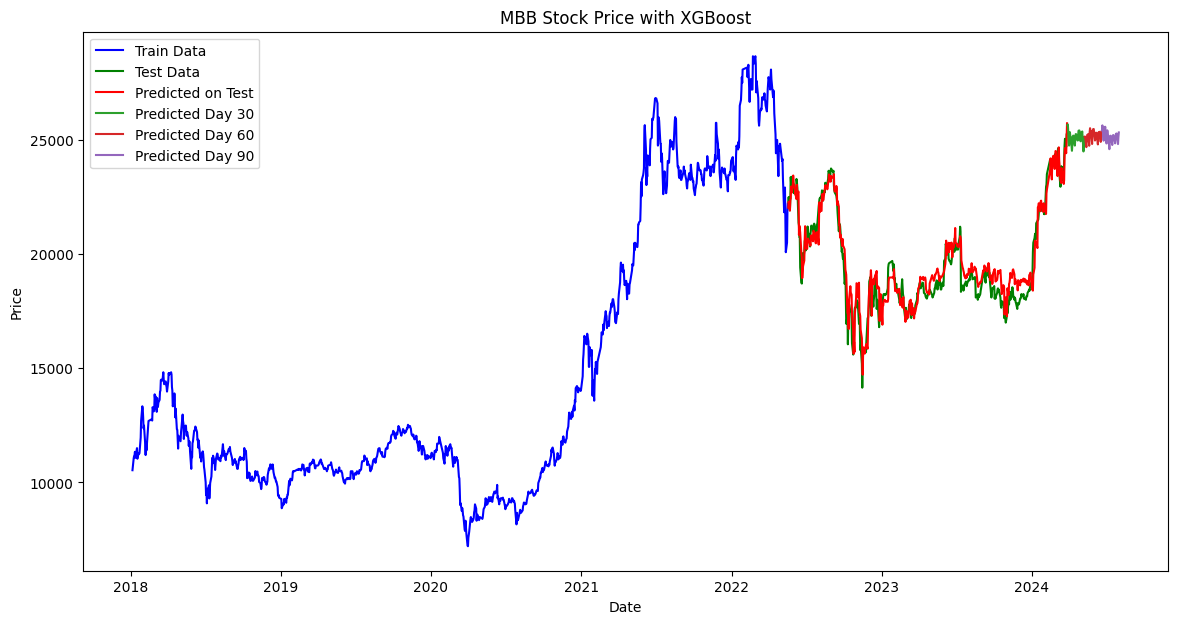

In [22]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load data into DataFrame df
df = pd.read_csv('../Dataset/MBB Historical Data.csv')

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])

# Convert other columns to numeric if necessary
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sort data by time from past to present
df.sort_values(by='Date', inplace=True)

# Create time features from Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Create lag features to capture patterns in the past
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Remove rows with NaN values due to lag feature creation
df.dropna(inplace=True)

# Select features and label
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Regression objective
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Number of training rounds
num_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')
# Plotting
plt.figure(figsize=(14, 7))

# Plot the training set
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Train Data', color='blue')

# Plot the test set
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Test Data', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted on Test', color='red')

# Additional predictions for the next 90 days
last_test_date = df['Date'].iloc[len(y_train) + len(y_test) - 1]
future_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90, freq='B')
future_df = pd.DataFrame({'Date': future_dates})
future_df['day'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['year'] = future_df['Date'].dt.year
future_df['day_of_week'] = future_df['Date'].dt.dayofweek
future_df['price_lag1'] = df['Price'].iloc[-1]
future_df['price_lag2'] = df['Price'].iloc[-2]
future_df['price_lag3'] = df['Price'].iloc[-3]
d_future = xgb.DMatrix(future_df[features])
future_pred = bst.predict(d_future)

# Divide the next 90 days into 3 periods of 30 days each and plot with different colors
future_len = len(future_dates)
segment_len = future_len // 3
for i in range(3):
    start_idx = i * segment_len
    end_idx = (i + 1) * segment_len if i < 2 else future_len
    plt.plot(future_df['Date'].iloc[start_idx:end_idx], future_pred[start_idx:end_idx], color=f'C{i+2}', label=f'Predicted Day {(i+1)*30}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MBB Stock Price with XGBoost')
plt.legend()
plt.show()

MBB 8:2

RMSE: 425.11
MAE: 305.03
MAPE: 1.57%


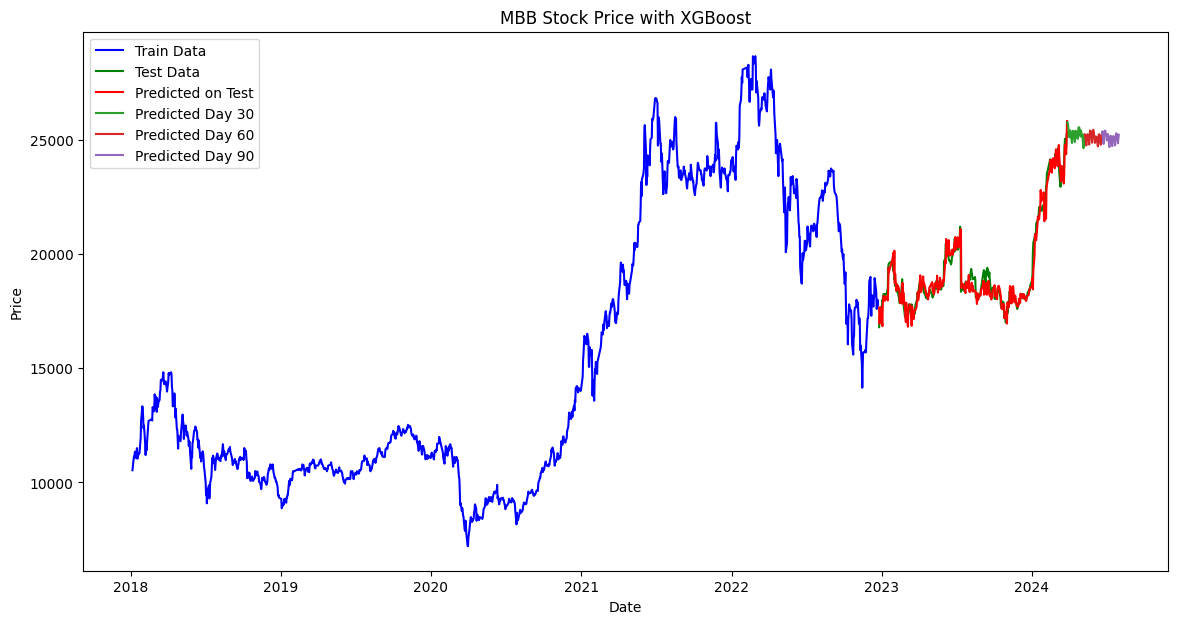

In [23]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load data into DataFrame df
df = pd.read_csv('../Dataset/MBB Historical Data.csv')

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])

# Convert other columns to numeric if necessary
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sort data by time from past to present
df.sort_values(by='Date', inplace=True)

# Create time features from Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Create lag features to capture patterns in the past
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Remove rows with NaN values due to lag feature creation
df.dropna(inplace=True)

# Select features and label
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Regression objective
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Number of training rounds
num_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')
# Plotting
plt.figure(figsize=(14, 7))

# Plot the training set
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Train Data', color='blue')

# Plot the test set
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Test Data', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted on Test', color='red')

# Additional predictions for the next 90 days
last_test_date = df['Date'].iloc[len(y_train) + len(y_test) - 1]
future_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90, freq='B')
future_df = pd.DataFrame({'Date': future_dates})
future_df['day'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['year'] = future_df['Date'].dt.year
future_df['day_of_week'] = future_df['Date'].dt.dayofweek
future_df['price_lag1'] = df['Price'].iloc[-1]
future_df['price_lag2'] = df['Price'].iloc[-2]
future_df['price_lag3'] = df['Price'].iloc[-3]
d_future = xgb.DMatrix(future_df[features])
future_pred = bst.predict(d_future)

# Divide the next 90 days into 3 periods of 30 days each and plot with different colors
future_len = len(future_dates)
segment_len = future_len // 3
for i in range(3):
    start_idx = i * segment_len
    end_idx = (i + 1) * segment_len if i < 2 else future_len
    plt.plot(future_df['Date'].iloc[start_idx:end_idx], future_pred[start_idx:end_idx], color=f'C{i+2}', label=f'Predicted Day {(i+1)*30}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MBB Stock Price with XGBoost')
plt.legend()
plt.show()

MBB 9:1

RMSE: 429.89
MAE: 316.95
MAPE: 1.55%


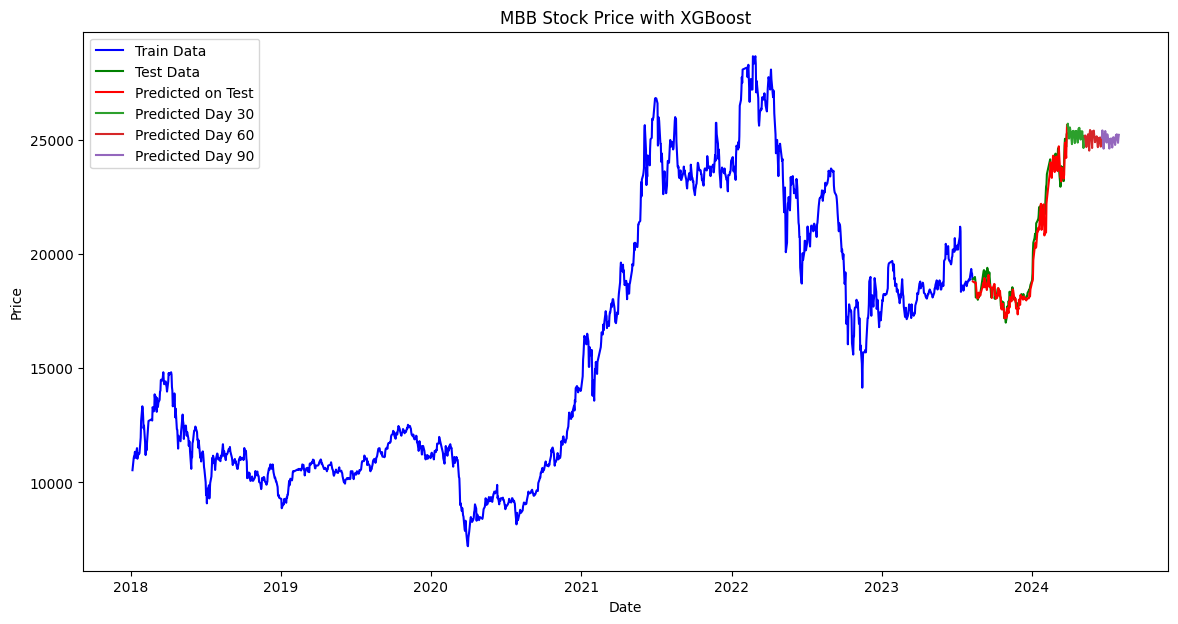

In [25]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load data into DataFrame df
df = pd.read_csv('../Dataset/MBB Historical Data.csv')

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])

# Convert other columns to numeric if necessary
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sort data by time from past to present
df.sort_values(by='Date', inplace=True)

# Create time features from Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Create lag features to capture patterns in the past
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Remove rows with NaN values due to lag feature creation
df.dropna(inplace=True)

# Select features and label
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Regression objective
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Number of training rounds
num_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')
# Plotting
plt.figure(figsize=(14, 7))

# Plot the training set
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Train Data', color='blue')

# Plot the test set
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Test Data', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted on Test', color='red')

# Additional predictions for the next 90 days
last_test_date = df['Date'].iloc[len(y_train) + len(y_test) - 1]
future_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90, freq='B')
future_df = pd.DataFrame({'Date': future_dates})
future_df['day'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['year'] = future_df['Date'].dt.year
future_df['day_of_week'] = future_df['Date'].dt.dayofweek
future_df['price_lag1'] = df['Price'].iloc[-1]
future_df['price_lag2'] = df['Price'].iloc[-2]
future_df['price_lag3'] = df['Price'].iloc[-3]
d_future = xgb.DMatrix(future_df[features])
future_pred = bst.predict(d_future)

# Divide the next 90 days into 3 periods of 30 days each and plot with different colors
future_len = len(future_dates)
segment_len = future_len // 3
for i in range(3):
    start_idx = i * segment_len
    end_idx = (i + 1) * segment_len if i < 2 else future_len
    plt.plot(future_df['Date'].iloc[start_idx:end_idx], future_pred[start_idx:end_idx], color=f'C{i+2}', label=f'Predicted Day {(i+1)*30}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MBB Stock Price with XGBoost')
plt.legend()
plt.show()

BIDV 7:3

RMSE: 1792.35
MAE: 1154.98
MAPE: 2.64%


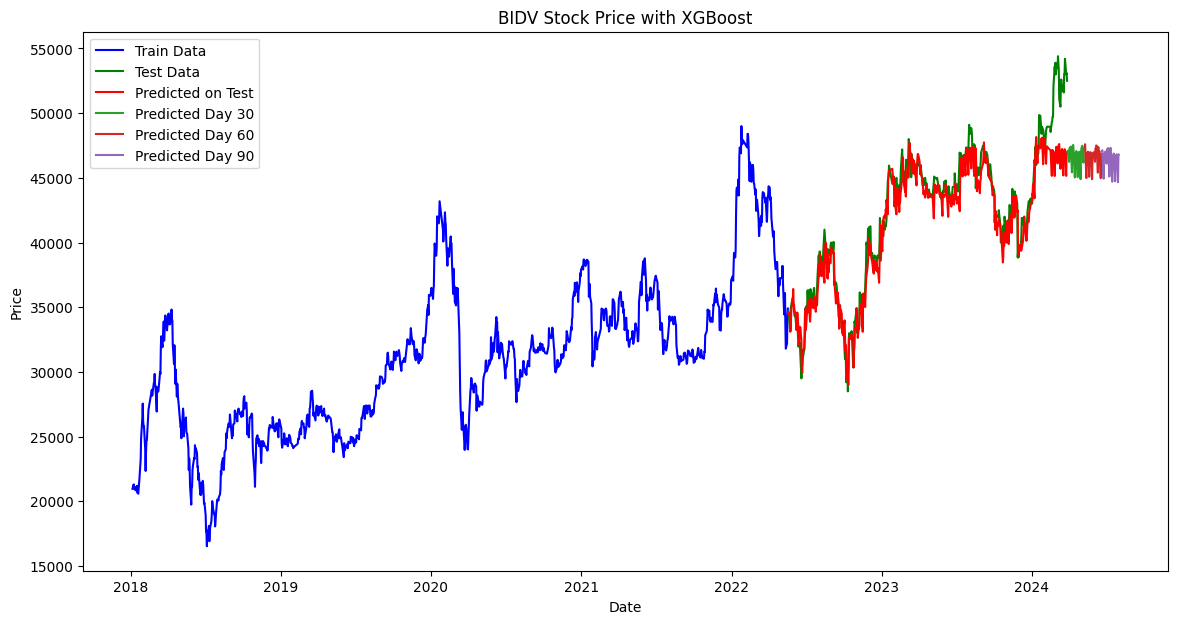

In [27]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load data into DataFrame df
df = pd.read_csv('../Dataset/BID Historical Data.csv')

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])

# Convert other columns to numeric if necessary
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sort data by time from past to present
df.sort_values(by='Date', inplace=True)

# Create time features from Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Create lag features to capture patterns in the past
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Remove rows with NaN values due to lag feature creation
df.dropna(inplace=True)

# Select features and label
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Regression objective
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Number of training rounds
num_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')
# Plotting
plt.figure(figsize=(14, 7))

# Plot the training set
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Train Data', color='blue')

# Plot the test set
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Test Data', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted on Test', color='red')

# Additional predictions for the next 90 days
last_test_date = df['Date'].iloc[len(y_train) + len(y_test) - 1]
future_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90, freq='B')
future_df = pd.DataFrame({'Date': future_dates})
future_df['day'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['year'] = future_df['Date'].dt.year
future_df['day_of_week'] = future_df['Date'].dt.dayofweek
future_df['price_lag1'] = df['Price'].iloc[-1]
future_df['price_lag2'] = df['Price'].iloc[-2]
future_df['price_lag3'] = df['Price'].iloc[-3]
d_future = xgb.DMatrix(future_df[features])
future_pred = bst.predict(d_future)

# Divide the next 90 days into 3 periods of 30 days each and plot with different colors
future_len = len(future_dates)
segment_len = future_len // 3
for i in range(3):
    start_idx = i * segment_len
    end_idx = (i + 1) * segment_len if i < 2 else future_len
    plt.plot(future_df['Date'].iloc[start_idx:end_idx], future_pred[start_idx:end_idx], color=f'C{i+2}', label=f'Predicted Day {(i+1)*30}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BIDV Stock Price with XGBoost')
plt.legend()
plt.show()

BIDV 8:2

RMSE: 2027.27
MAE: 1255.36
MAPE: 2.63%


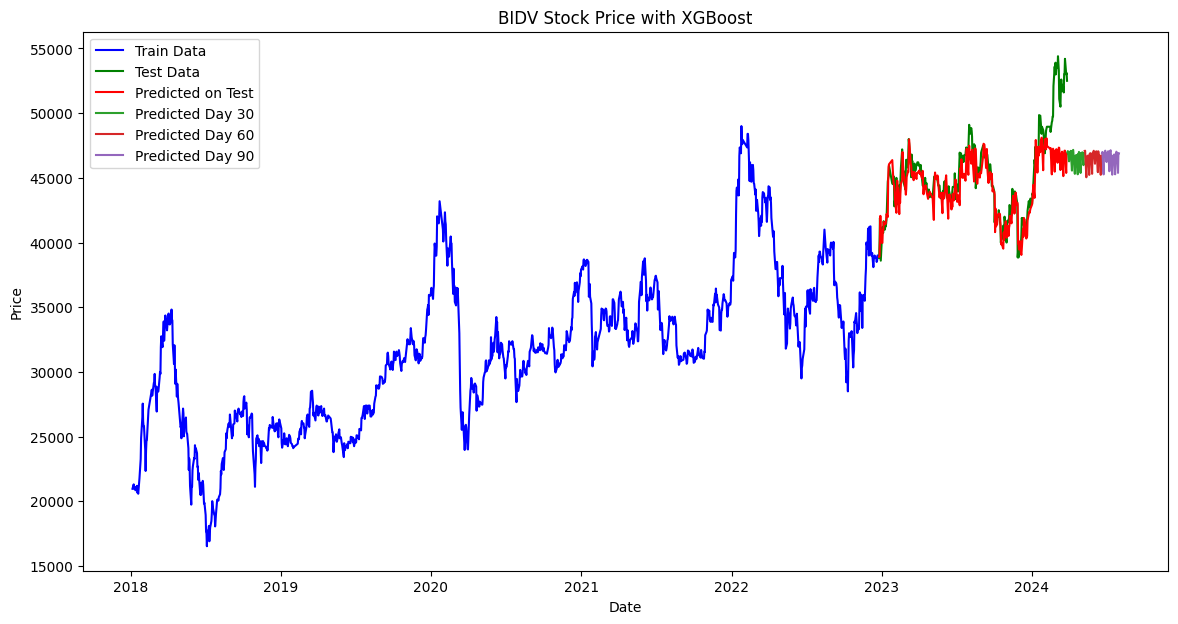

In [28]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load data into DataFrame df
df = pd.read_csv('../Dataset/BID Historical Data.csv')

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])

# Convert other columns to numeric if necessary
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sort data by time from past to present
df.sort_values(by='Date', inplace=True)

# Create time features from Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Create lag features to capture patterns in the past
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Remove rows with NaN values due to lag feature creation
df.dropna(inplace=True)

# Select features and label
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Regression objective
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Number of training rounds
num_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')
# Plotting
plt.figure(figsize=(14, 7))

# Plot the training set
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Train Data', color='blue')

# Plot the test set
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Test Data', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted on Test', color='red')

# Additional predictions for the next 90 days
last_test_date = df['Date'].iloc[len(y_train) + len(y_test) - 1]
future_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90, freq='B')
future_df = pd.DataFrame({'Date': future_dates})
future_df['day'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['year'] = future_df['Date'].dt.year
future_df['day_of_week'] = future_df['Date'].dt.dayofweek
future_df['price_lag1'] = df['Price'].iloc[-1]
future_df['price_lag2'] = df['Price'].iloc[-2]
future_df['price_lag3'] = df['Price'].iloc[-3]
d_future = xgb.DMatrix(future_df[features])
future_pred = bst.predict(d_future)

# Divide the next 90 days into 3 periods of 30 days each and plot with different colors
future_len = len(future_dates)
segment_len = future_len // 3
for i in range(3):
    start_idx = i * segment_len
    end_idx = (i + 1) * segment_len if i < 2 else future_len
    plt.plot(future_df['Date'].iloc[start_idx:end_idx], future_pred[start_idx:end_idx], color=f'C{i+2}', label=f'Predicted Day {(i+1)*30}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BIDV Stock Price with XGBoost')
plt.legend()
plt.show()

BIDV 9:1

RMSE: 2301.83
MAE: 1519.39
MAPE: 3.14%


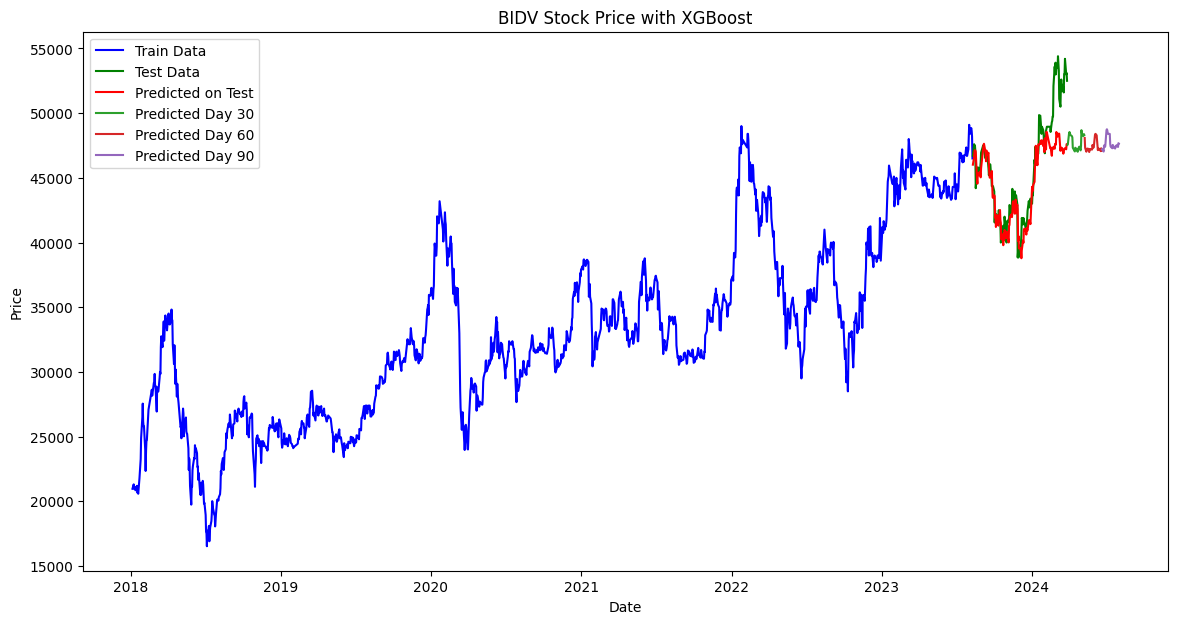

In [29]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load data into DataFrame df
df = pd.read_csv('../Dataset/BID Historical Data.csv')

# Convert Date column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])

# Convert other columns to numeric if necessary
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Sort data by time from past to present
df.sort_values(by='Date', inplace=True)

# Create time features from Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.dayofweek

# Create lag features to capture patterns in the past
df['price_lag1'] = df['Price'].shift(1)
df['price_lag2'] = df['Price'].shift(2)
df['price_lag3'] = df['Price'].shift(3)

# Remove rows with NaN values due to lag feature creation
df.dropna(inplace=True)

# Select features and label
features = ['day', 'month', 'year', 'day_of_week', 'price_lag1', 'price_lag2', 'price_lag3']
X = df[features]
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Convert data to XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost model
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',  # Regression objective
    'eta': 0.1,
    'max_depth': 5,
    'eval_metric': 'rmse'
}

# Number of training rounds
num_round = 100

# Train the model
bst = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.2f}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')
# Plotting
plt.figure(figsize=(14, 7))

# Plot the training set
plt.plot(df['Date'].iloc[:len(y_train)], y_train, label='Train Data', color='blue')

# Plot the test set
plt.plot(df['Date'].iloc[len(y_train):], y_test, label='Test Data', color='green')
plt.plot(df['Date'].iloc[len(y_train):], y_pred, label='Predicted on Test', color='red')

# Additional predictions for the next 90 days
last_test_date = df['Date'].iloc[len(y_train) + len(y_test) - 1]
future_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=90, freq='B')
future_df = pd.DataFrame({'Date': future_dates})
future_df['day'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['year'] = future_df['Date'].dt.year
future_df['day_of_week'] = future_df['Date'].dt.dayofweek
future_df['price_lag1'] = df['Price'].iloc[-1]
future_df['price_lag2'] = df['Price'].iloc[-2]
future_df['price_lag3'] = df['Price'].iloc[-3]
d_future = xgb.DMatrix(future_df[features])
future_pred = bst.predict(d_future)

# Divide the next 90 days into 3 periods of 30 days each and plot with different colors
future_len = len(future_dates)
segment_len = future_len // 3
for i in range(3):
    start_idx = i * segment_len
    end_idx = (i + 1) * segment_len if i < 2 else future_len
    plt.plot(future_df['Date'].iloc[start_idx:end_idx], future_pred[start_idx:end_idx], color=f'C{i+2}', label=f'Predicted Day {(i+1)*30}')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BIDV Stock Price with XGBoost')
plt.legend()
plt.show()